In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
def csv_to_df(file):
    with open(file) as f:
        df = pd.read_csv(f)
    return df
def get_ax():
    ax = plt.subplot()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return ax
def remove_space(x):
    return x.strip()

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
_5 = csv_to_df("2015.csv")
_5 = _5[['Country','Region','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Family',
       'Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]
_6 = csv_to_df("2016.csv")
_6 = _6[['Country','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Family',
       'Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]
_5_6 = pd.merge(left=_5, right=_6, left_on='Country', right_on='Country', suffixes=["_5", "_6"])
_7 = csv_to_df("2017.csv")
_7 = _7.rename(columns={'Happiness.Rank':'Happiness Rank_7','Generosity':'Generosity_7','Family':'Family_7','Freedom':'Freedom_7','Happiness.Score':'Happiness Score_7', 
                        'Economy..GDP.per.Capita.':'Economy (GDP per Capita)_7','Health..Life.Expectancy.':'Health (Life Expectancy)_7',
                       'Trust..Government.Corruption.':'Trust (Government Corruption)_7','Dystopia.Residual':'Dystopia Residual_7'})
_7 = _7[['Country','Happiness Rank_7','Happiness Score_7','Economy (GDP per Capita)_7','Family_7',
       'Health (Life Expectancy)_7','Freedom_7','Trust (Government Corruption)_7','Generosity_7','Dystopia Residual_7']]
_567 = pd.merge(left=_5_6, right=_7, left_on='Country', right_on='Country')
_8 = csv_to_df("2018.csv")
_8 = _8.rename(columns={'Country or region':'Country','Overall rank':'Happiness Rank_8','Score':'Happiness Score_8','Social support':'Social support_8',
                        'GDP per capita':'Economy (GDP per Capita)_8','Healthy life expectancy':'Health (Life Expectancy)_8',
                        'Freedom to make life choices':'Freedom_8','Generosity':'Generosity_8','Perceptions of corruption':'Trust (Government Corruption)_8'})
_5678 = pd.merge(left=_567, right=_8, left_on='Country', right_on='Country')
_9 = csv_to_df("2019.csv")
_9 = _9.rename(columns={'Country or region':'Country','Overall rank':'Happiness Rank_9','Score':'Happiness Score_9','Social support':'Social support_9',
                        'GDP per capita':'Economy (GDP per Capita)_9','Healthy life expectancy':'Health (Life Expectancy)_9',
                        'Freedom to make life choices':'Freedom_9','Generosity':'Generosity_9','Perceptions of corruption':'Trust (Government Corruption)_9'})
happy = pd.merge(left=_5678, right=_9, left_on='Country', right_on='Country')
facts = pd.read_csv("countries of the world.csv", decimal=",")
happy = happy.sort_values(by=['Country'])
happier = pd.merge(left=happy, right=facts, on='Country')
facts["Country"] = facts["Country"].apply(remove_space)
# From 158 Countries to 141/132 because some countries weren't in each year's csv file.
happier = pd.merge(left=happy, right=facts, on='Country')

/home/mek89/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


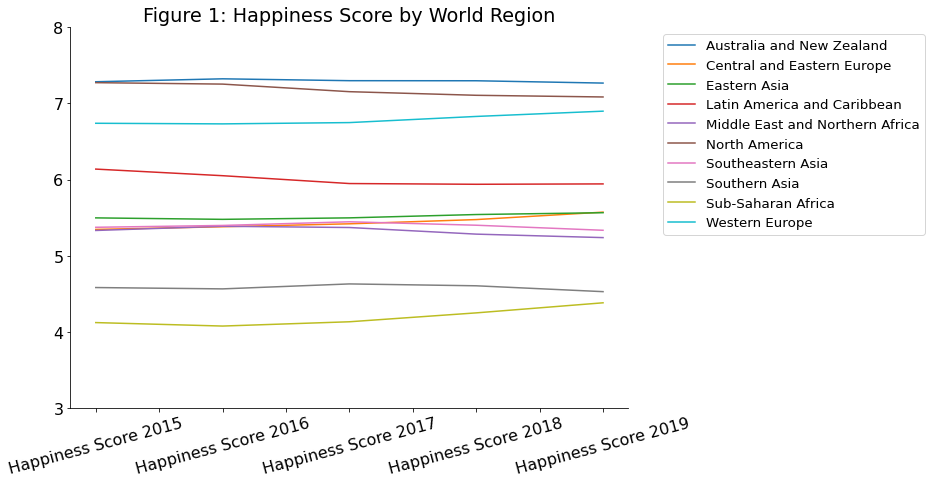

In [3]:
# Figure 1
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})
happier["Happy_Score_Avg"] = (happier['Happiness Score_5'] + happier['Happiness Score_6'] + happier['Happiness Score_7'] + happier['Happiness Score_8'] + happier['Happiness Score_9'])/5
p1 = happy[["Region", "Happiness Score_5", 'Happiness Score_6', 'Happiness Score_7', 'Happiness Score_8', 'Happiness Score_9']]
p1 = p1.rename(columns={"Happiness Score_5":"Happiness Score 2015", 'Happiness Score_6':"Happiness Score 2016", 'Happiness Score_7':"Happiness Score 2017", 'Happiness Score_8':"Happiness Score 2018", 'Happiness Score_9':"Happiness Score 2019"})
p1 = p1.groupby(["Region"]).mean()
ax = p1.transpose().plot(title="Figure 1: Happiness Score by World Region", ylim=[3,8] ,rot=15, figsize=(10,7))
ax = get_ax()
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
# Note: Interesting thing is that looking at the csv files Switzerland, Denmark, Norway etc. were always ranked near
# highest, but by region they are third.

/home/mek89/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


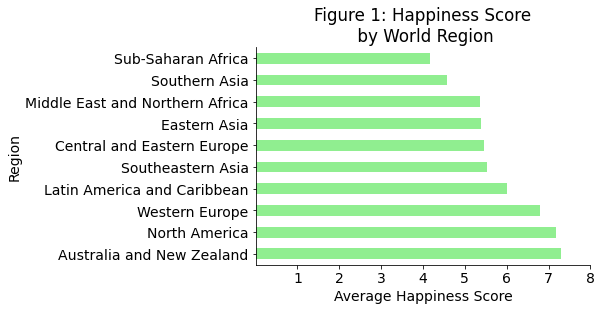

In [19]:
p1 = pd.concat([happier["Region_x"], happier["Happy_Score_Avg"]], axis=1, keys=["Region", "Happy"])
p1 = p1.groupby(["Region"]).mean()
p1 = p1.sort_values("Happy", ascending=False)
p1 = p1.reset_index()
p1 = p1.set_index("Region")
ax = p1.plot.barh(use_index=True, legend=False, color='lightgreen', title="Figure 1: Happiness Score\n by World Region", xticks=[1, 2, 3, 4,5, 6,7 ,8])
ax = get_ax()
ax.set_xlabel("Average Happiness Score")
plt.savefig("fig1.png", bbox_inches='tight')

In [5]:
happier = happier.fillna(happier.mean())
happier["Trust_Gov_Avg"] = happier["Trust (Government Corruption)_5"] + happier["Trust (Government Corruption)_6"] + happier["Trust (Government Corruption)_7"] + happier["Trust (Government Corruption)_8"] + happier["Trust (Government Corruption)_9"]
happier["Freedom_Avg"] = happier["Freedom_5"] + happier["Freedom_6"] + happier["Freedom_7"] + happier["Freedom_8"] + happier["Freedom_9"]
train_l = []
test_l = []
for i in happier.iterrows():
    if i[0]%2 == 0:
        train_l.append(i[1])
    else:
        test_l.append(i[1])
train = pd.DataFrame(train_l)
test = pd.DataFrame(test_l)
#train["Happy_Score_Avg"] = (train['Happiness Score_5'] + train['Happiness Score_6'] + train['Happiness Score_7'] + train['Happiness Score_8'] + train['Happiness Score_9'])/5
#test["Happy_Score_Avg"] = (test['Happiness Score_5'] + test['Happiness Score_6'] + test['Happiness Score_7'] + test['Happiness Score_8'] + test['Happiness Score_9'])/5
train.head(3)

,Country,Region_x,Happiness Rank_5,Happiness Score_5,Economy (GDP per Capita)_5,Family_5,Health (Life Expectancy)_5,Freedom_5,Trust (Government Corruption)_5,Generosity_5,Dystopia Residual_5,Happiness Rank_6,Happiness Score_6,Economy (GDP per Capita)_6,Family_6,Health (Life Expectancy)_6,Freedom_6,Trust (Government Corruption)_6,Generosity_6,Dystopia Residual_6,Happiness Rank_7,Happiness Score_7,Economy (GDP per Capita)_7,Family_7,Health (Life Expectancy)_7,Freedom_7,Trust (Government Corruption)_7,Generosity_7,Dystopia Residual_7,Happiness Rank_8,Happiness Score_8,Economy (GDP per Capita)_8,Social support_8,Health (Life Expectancy)_8,Freedom_8,Generosity_8,Trust (Government Corruption)_8,Happiness Rank_9,Happiness Score_9,Economy (GDP per Capita)_9,Social support_9,Health (Life Expectancy)_9,Freedom_9,Generosity_9,Trust (Government Corruption)_9,Region_y,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Happy_Score_Avg,Trust_Gov_Avg,Freedom_Avg
0,Afghanistan,Southern Asia,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801,145,3.632,0.332,0.537,0.255,0.085,0.191,0.036,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,3.5128,0.290468,0.589620
2,Algeria,Middle East and Northern Africa,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,38,6.355,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904,53,5.872,1.091864,1.146217,0.617585,0.233336,0.146096,0.069437,2.567604,84,5.295,0.979,1.154,0.687,0.077,0.055,0.135,88,5.211,1.002,1.160,0.785,0.086,0.073,0.114,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,5.6676,0.730496,0.892186
4,Armenia,Central and Eastern Europe,127,4.350,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,1.75873,121,4.360,0.86086,0.62477,0.64083,0.14037,0.03616,0.07793,1.97864,121,4.376,0.900597,1.007484,0.637524,0.198303,0.026674,0.083488,1.521499,129,4.321,0.816,0.990,0.666,0.260,0.077,0.028,116,4.559,0.850,1.055,0.815,0.283,0.095,0.064,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418,4.3932,0.193834,1.080143


array([-0.02541702])

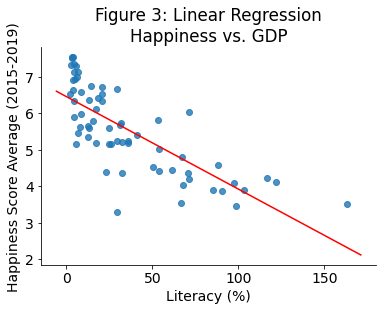

In [18]:
# Figure 3
X = train[["Infant mortality (per 1000 births)"]]
X2 = test[["Infant mortality (per 1000 births)"]]
y = train["Happy_Score_Avg"]
y2 = test["Happy_Score_Avg"]
lr = LinearRegression()
lr.fit(X, y)

pipe = Pipeline([("pf", PolynomialFeatures()),
               ("lr", LinearRegression())])
pipe.fit(X, y)
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots()
ax = get_ax()
ax.scatter(x = train["Infant mortality (per 1000 births)"], y = train["Happy_Score_Avg"], alpha=0.8)
ax.set_xlabel("Literacy (%)")
ax.set_ylabel("Happiness Score Average (2015-2019)")
ax.set_title("Figure 3: Linear Regression\nHappiness vs. GDP")
tup = tuple((lr.coef_[0], lr.intercept_))
x_vals = np.array(ax.get_xlim())
y_vals = tup[0]*x_vals + tup[1]
plt.plot(x_vals, y_vals, color="red")
plt.savefig("fig3.png", bbox_inches='tight')
lr.score(X2, y2)
lr.coef_
# Note: GDP fit score is about 54.6, while Phones per 1000 people is 56.1!

2.918077378386186

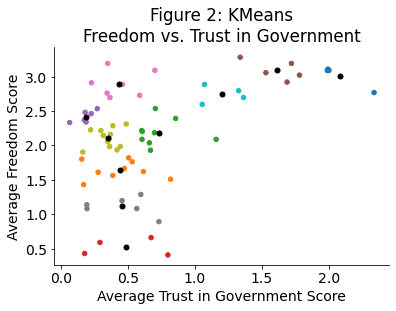

In [7]:
km_df = pd.concat([train["Trust_Gov_Avg"], train["Freedom_Avg"]], axis=1, keys=["Trust_Gov_Avg", "Freedom_Avg"])
km = KMeans(n_clusters=10)
km_df
km.fit(km_df)
km_df2 = km_df.copy()
km_df2["clusters"] = km.predict(km_df)
fig, ax = plt.subplots()
ax = get_ax()
km_df2.plot.scatter(x="Trust_Gov_Avg", y="Freedom_Avg", c=km_df2["clusters"], cmap='tab10', colorbar=False, ax=ax)
centroids = pd.DataFrame(km.cluster_centers_)
centroids.plot.scatter(x=0, y=1, c='black', s=25, ax=ax)
ax.set_xlabel("Average Trust in Government Score")
ax.set_ylabel("Average Freedom Score")
ax.set_title("Figure 2: KMeans\nFreedom vs. Trust in Government")
plt.savefig("fig2.png", bbox_inches='tight')
km.inertia_
# Predicted that 10 clusters was good because of 10 regions, going up or down increases inertia by ~0.3, don't think
# regions have good boundaries in the test scores.

In [8]:
# pd.concat([df1['c'], df2['c']], axis=1, keys=['df1', 'df2'])
# happy = happy.sort_index()
# happy = happy.drop(columns=["Country", "Region"])
# train_l = []
# test_l = []
# for i in happy.iterrows():
#     if i[0]%2 == 0:
#         train_l.append(i[1])
#     else:
#         test_l.append(i[1])
# train = pd.DataFrame(train_l)
# test = pd.DataFrame(test_l)

In [9]:
# pca = PCA(n_components=3)
# pca.fit(train)
# key = pca.components_

In [10]:
# array = pca.transform(train)
# train_data = pd.DataFrame(array, columns=["pca1", "pca2", "pca3"])
# (train_data @ key + pca.mean_).round(2)